In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('survey_results_public.csv')
print(len(df))

98855


C:\Users\Po\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. Describe your data set
The Developer Profile
This exercise looks into what does a developer do day-to-day.  The data comes from a 2018 survey done at stackoverflow.com, in which web site users answer questions about themselves.


2. Ask and answer analytic questions

What programming language do developers use the most for work?

In [3]:
lang_worked = pd.DataFrame(columns=['Respondent', 'LanguageWorkedWith'])
data = []
for index, row in df.loc[df['LanguageWorkedWith'].notnull()].iterrows():
    languages = row['LanguageWorkedWith'].split(';')
    if index <= 98856:
        #print(languages)
        for language in languages:
            language = language.strip()
            if language != '':
                dict = { 'Respondent': row['Respondent'], 'LanguageWorkedWith': language }
                data.append(dict)
                #print('row added')
lang_worked = lang_worked.append(data, ignore_index=True)
lang_worked.LanguageWorkedWith.value_counts().head(10)

JavaScript    54686
HTML          53628
CSS           50979
SQL           44670
Java          35521
Bash/Shell    31172
Python        30359
C#            26954
PHP           24071
C++           19872
Name: LanguageWorkedWith, dtype: int64

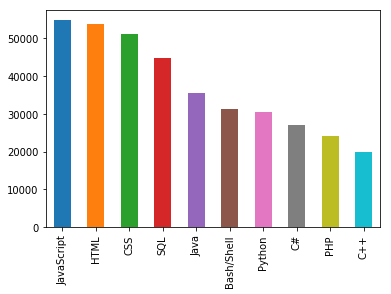

In [4]:
lang_worked.LanguageWorkedWith.value_counts().head(10).plot(kind='bar')

What ist the average number of languages developers work with?

In [5]:
lang_worked.groupby('Respondent').count().mean()

LanguageWorkedWith    6.199964
dtype: float64

What type of developer related role pays the most?

In [15]:
role_worked = pd.DataFrame(columns=['Respondent', 'DevType', 'ConvertedSalary'])
data = []
for index, row in df.loc[df['DevType'].notnull()].iterrows():
    roles = row['DevType'].split(';')
    if index <= 98856:
        #print(roles)
        for role in roles:
            role = role.strip()
            if role != '':
                dict = { 'Respondent': row['Respondent'], 'DevType': role, 'ConvertedSalary': row['ConvertedSalary'] }
                data.append(dict)
                #print('row added')
role_worked = role_worked.append(data, ignore_index=True)
#role_worked.DevType.value_counts().head(40)

In [14]:
role_worked.groupby('DevType')['ConvertedSalary'].mean().sort_values(ascending=False)

DevType
Engineering manager                              129926.441641
C-suite executive (CEO, CTO, etc.)               117667.222840
DevOps specialist                                115029.313948
Product manager                                  112144.072432
Marketing or sales professional                  106729.302521
Data or business analyst                         106542.401908
Data scientist or machine learning specialist    101430.365400
System administrator                             101142.149695
Full-stack developer                             100156.391334
Database administrator                            97767.508619
Back-end developer                                96609.911581
Desktop or enterprise applications developer      96060.245373
QA or test developer                              95877.932279
Front-end developer                               95027.715128
Embedded applications or devices developer        94803.100790
Designer                                       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

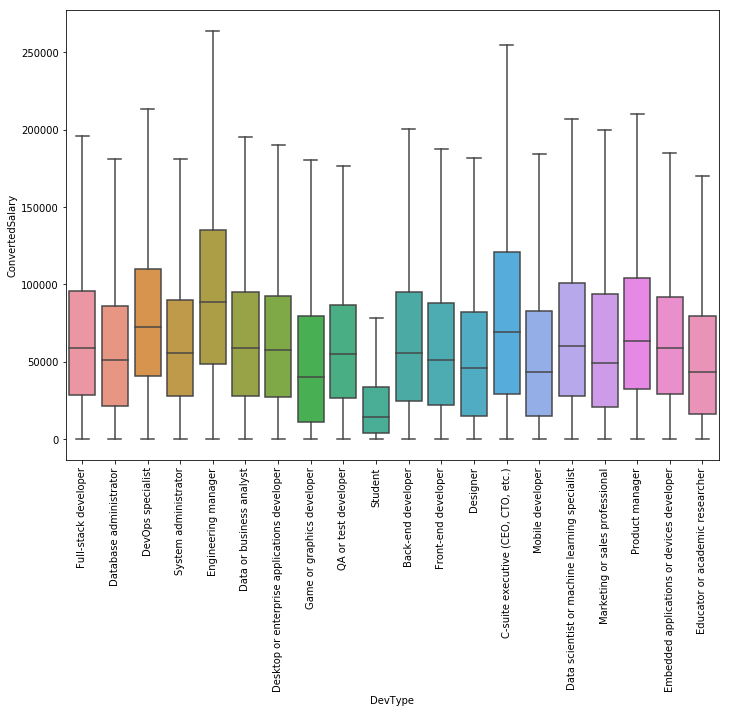

In [9]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="DevType", y="ConvertedSalary", showfliers=False, data=role_worked, ax=ax);
plt.xticks(rotation=90)

What is the age distribution of the developers?

In [23]:
df.loc[df['Age'].notnull()].Age.value_counts()

25 - 34 years old     31759
18 - 24 years old     15249
35 - 44 years old     11477
45 - 54 years old      3313
Under 18 years old     1638
55 - 64 years old       959
65 years or older       179
Name: Age, dtype: int64

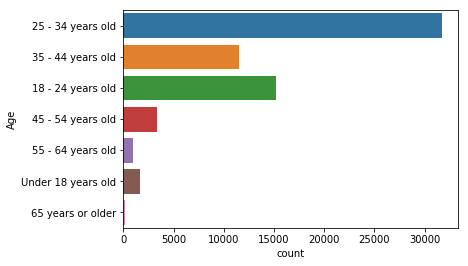

In [24]:
sns.countplot(y="Age", data=df)

3. Ask and answer analytic questions

More work needs to be done to get the relationship of the number of years on the job to the salary earned
Most of the respondents are relatively young and thus the salary tends to be on the low side.  I would change the survey to ask participants to enter the number of years in the specified devtype rather than overall experience in the field.